In [199]:
# import roslib
# import rospy
# from geometry_msgs.msg import Twist
# from geometry_msgs.msg import Point
# from sensor_msgs.msg import LaserScan
# from nav_msgs.msg import Odometry

import math
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
# import geometry_msgs.msg
# import turtlesim.srv
# roslib.load_manifest('lab2')
# import tf
# import turtlesim.msg
# from visualization_msgs.msg import Marker
import random


/home/ubuntu/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [200]:
# Global Parameters
sinx = np.array((361,1)) 
cosx = np.array((361,1))
pointX = []
pointY = []
ranges = np.zeros((361, 2))

In [201]:
a = np.array([12, 31, 312, 1321, 12312, 1231,1, 21])
b = (2,6,3)
b = np.array(b)
# np.argmin(a[b])
b[b==2] = 0
print b
print b == 3
print a

[0 6 3]
[False False  True]
[   12    31   312  1321 12312  1231     1    21]


In [202]:
#Ransac Implementation
def ransacimp(x, y, iter, threshold):
#     x = ranges[:,0]
#     y = ranges[:,1]
    ln = len(x)
    indexes = range(ln)
    global pointX, pointY
    points = []
    pointX = [-1]
    pointY = [-1]
    somethreshold = ln * 0.15
    k = iter
    
    mx = -1
    ymx = -1
    mn = -1
    ymn = -1
    
    print "ENTRY in the ransacimp function "
    for r in range(2):
#         threshold = threshold + 0.2
        inl = []
        outl = []
        for i in range(k):
            tempinl = []
            tempoutl = []
            
            index1 = random.randint(0,len(indexes)-1)
            index2 = random.randint(0,len(indexes)-1)
            
            if index1 == index2:
                continue
            x1 = x[indexes[index1]]
            y1 = y[indexes[index1]]
            
            x2 = x[indexes[index2]]
            y2 = y[indexes[index2]]
            for j in (indexes):
                x0 = x[j]
                y0 = y[j]
                dist = abs((y2 - y1) * x0 - (x2 - x1)*y0 + x2 * y1 - y2 * x1) / math.sqrt((y2 - y1) * (y2 - y1) + (x2 - x1) * (x2 - x1))
#                 print dist
                if dist < threshold:
                    # add inliners
                    tempinl.append(j)
                else:
                    # add outliers
                    tempoutl.append(j)
            if len(inl) < len(tempinl):
                inl = tempinl
                outl = tempoutl
                mx, ymx, mn, ymn = getmaxindex(inl, indexes, index1, index2)
                in1 = index1
                in2 = index2
            
        #Add new line two something for latter use
        if len(inl) > 4:
            print "before adding inleers"
            print inl
            pointX.append(mx)
            print "after ading"
            pointY.append(ymx)
            pointX.append(mn)
            pointY.append(ymn)
            indexes = outl
        if len(indexes) < somethreshold:
            break


ENTRY in the ransacimp function 
before adding inleers
[3, 11, 14, 15, 17, 22, 24, 25, 30, 31, 38, 39, 40, 42, 43, 45, 47, 48, 49]
after ading
before adding inleers
[1, 2, 4, 6, 9, 13, 21, 27, 28, 32, 36]
after ading


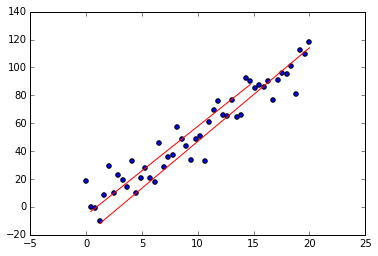

In [165]:
n = 50
x = np.linspace(0,20,num=n)

# equation of line y = mx + c
y = 5*x + 2

# add gaussian noise
noise = np.random.normal(loc = 0.0, scale=10.0, size=n)
y += noise
ranges = np.zeros((len(x),2))
ranges[:,0] = x
ranges[:,1] = y

inlier_dist_thresh = 0.6
ransac_iter = 50
ransacimp(x,y,ransac_iter,inlier_dist_thresh)
plot_x = np.array([0,20])
plt.close()
plt.scatter(x,y,label='points')
for i in range(1,(len(pointX)+1),2):
    plt.plot(pointX[i:i+2], pointY[i:i+2],c='r')
plt.show()

In [ ]:
def ransac_multi_lines(x, y, iter, threshold):
    

In [82]:
def getmaxindex(inl, indexes, index1, index2):
    mx = np.max(ranges[inl,0]) 
    mn = np.min(ranges[inl,0])
    p1 = ranges[indexes[index1],:]
    p2 = ranges[indexes[index2],:]
    if p2[0] == p1[0]:
        return mx, np.max(ranges[inl, 1]), mn, np.min(ranges[inl, 1])
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])
    ymx = m * (mx - p1[0]) + p1[1]
    ymn = m * (mn - p1[0]) + p1[1]
#     print mx, ymx, mn, ymn
    return mx, ymx, mn, ymn


Generating Points with Some Error

2.0


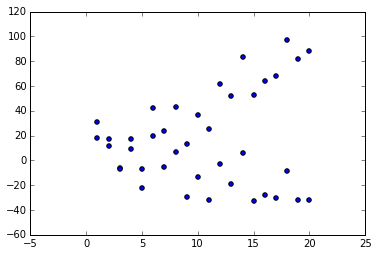

In [130]:
n = 20
x1 = np.linspace(1,20,num=n)
y1 = 5 * x1 - 10
x2 = np.linspace(1,20,num=n)
y2 = -2 * x2 + 10
noise = np.random.normal(loc = 0.0, scale = 15.0, size = n)
y1 += noise

y2 += noise 

plt.scatter(x1, y1)
plt.scatter(x2, y2)

ranges = np.zeros((x1.shape[0] + x2.shape[0], 2))

ranges[:x1.shape[0],0] = x1
ranges[x1.shape[0]:,0] = x2
ranges[:x1.shape[0],1] = y1
ranges[x2.shape[0]:,1] = y2

print ranges[1,0]

ENTRY in the ransacimp function 
before adding inleers
[0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 46, 47, 48]
after ading
[-1, 19.591836734693878, 0.0] [-1, 105.20303739716198, -5.3044061077120617]
1
3


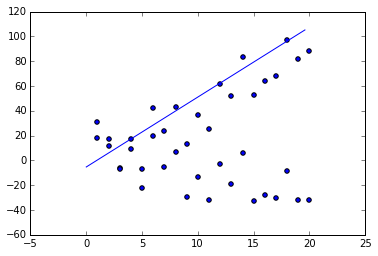

In [156]:
x = ranges[:,0]
y = ranges[:,1]
ransacimp(x, y, 20, 3)

plt.scatter(x1, y1)
plt.scatter(x2, y2)
print pointX, pointY
for i in range(1,(len(pointX)+1),2):
    plt.plot(pointX[i:i+2], pointY[i:i+2])
    print i

ENTRY in the ransacimp function 
before adding inleers
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
after ading
before adding inleers
[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
after ading
1
3
5


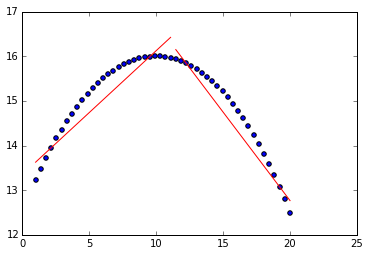

In [160]:
n = 50
x = np.linspace(1, 20, num = n)
y = np.sqrt(np.abs(256 - (x - 10)**2))
# # ranges[:,1] = y
ranges = np.zeros((n, 2))
ranges[:,0] = x
ranges[:,1] = y
ransacimp(x, y, 20, 0.5)
list_line_x = pointX
list_line_y = pointY

plt.close()
plt.scatter(x,y)
plot_x = np.array([0,20])
for i in range(1,(len(pointX)+1),2):
    plt.plot(pointX[i:i+2], pointY[i:i+2],c='r')
    print i
plt.show()

ENTRY in the ransacimp function 
before adding inleers
[39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
after ading
before adding inleers
[5, 28, 29, 30, 31, 32, 33, 34, 35, 36]
after ading
1
3
5


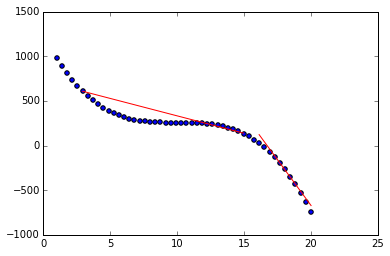

In [163]:
n = len(x)
y = 256 - (x - 10)**3
ranges = np.zeros((n, 2))
ranges[:,0] = x
ranges[:,1] = y
ransacimp(x, y, 20, 0.5)
list_line_x = pointX
list_line_y = pointY

plt.close()
plt.scatter(x,y)
plot_x = np.array([0,20])
for i in range(1,(len(pointX)+1),2):
    plt.plot(pointX[i:i+2], pointY[i:i+2],c='r')
    print i
plt.show()